# 1. EXPLORATORY DATA ANALYSIS (EDA)

In [1]:
# Importing libraries for use
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
# Mounting the drive to access customer churn dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading and reading the data using the Pandas library
customer_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv')

In [4]:
# Inspecting the first five shape of the customer churn dataset
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Visualization and Interpretation

In [5]:
# Dropping the customerID as it does not directly affect the Churn in the dataset
customer_data.drop(['customerID'], axis = 1, inplace = True)

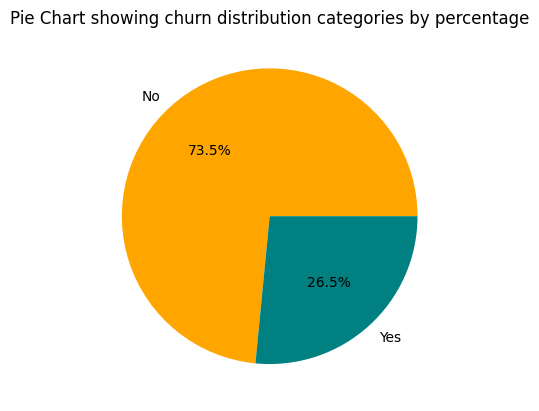

In [6]:
customer_column = customer_data["Churn"].value_counts()

fig, ax = plt.subplots()
ax.pie(customer_column, labels=customer_column.index, autopct='%1.1f%%', colors=["orange", "teal"])
ax.set_title('Pie Chart showing churn distribution categories by percentage')

plt.show()

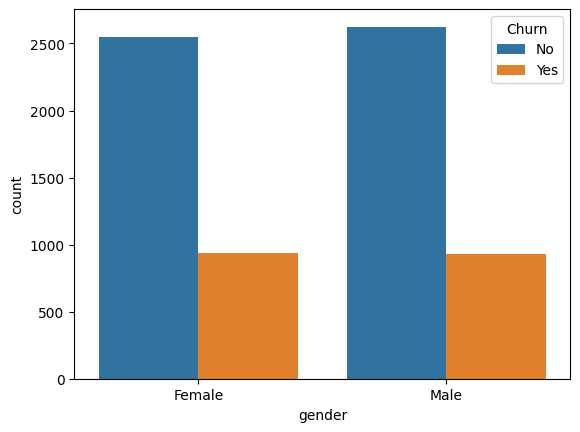

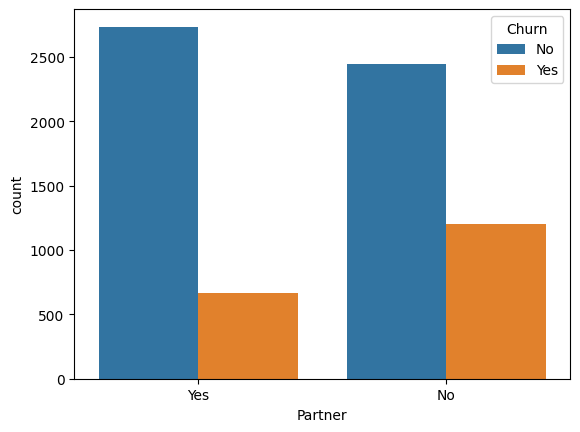

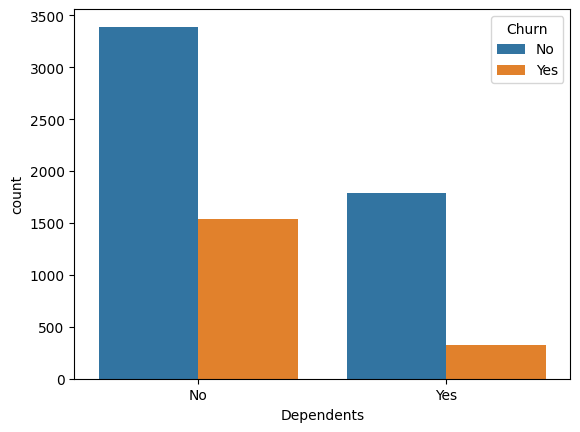

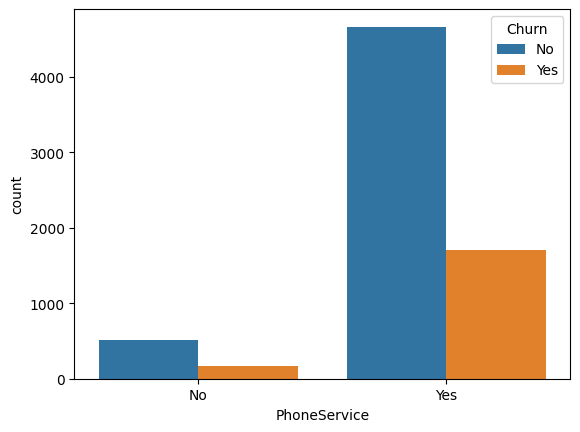

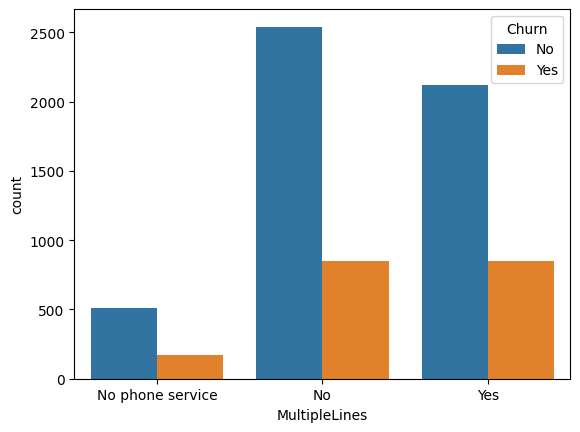

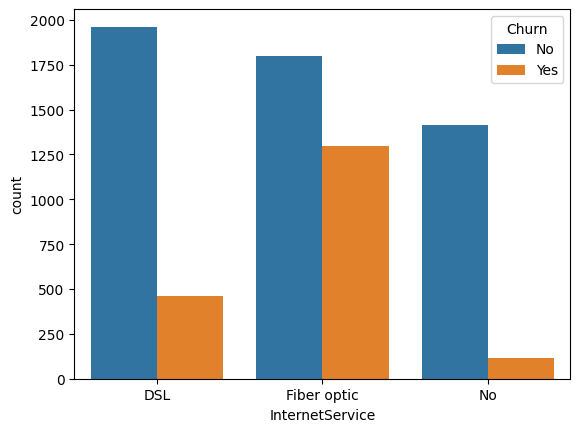

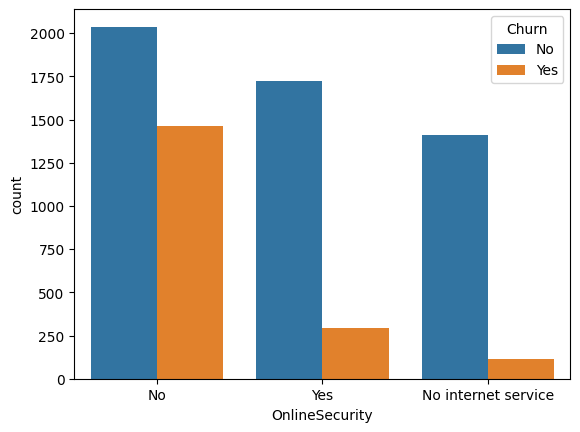

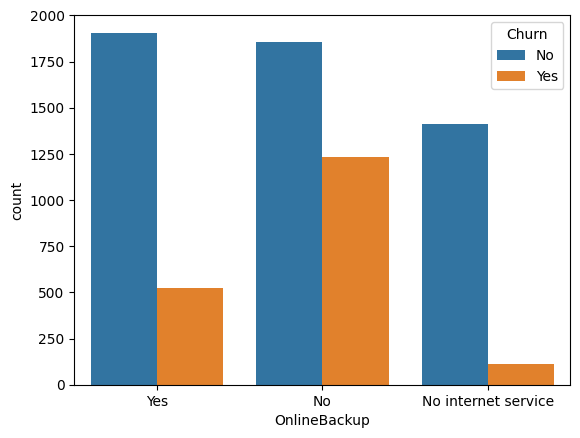

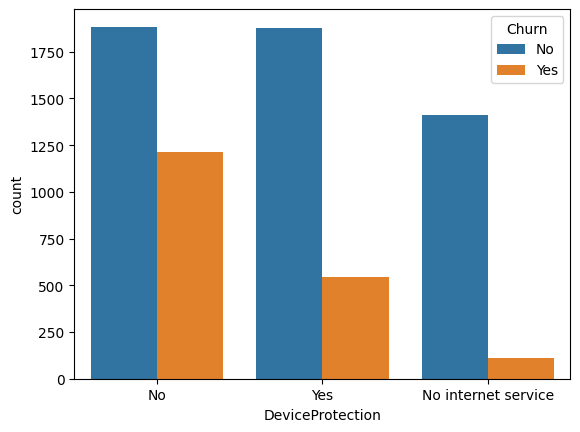

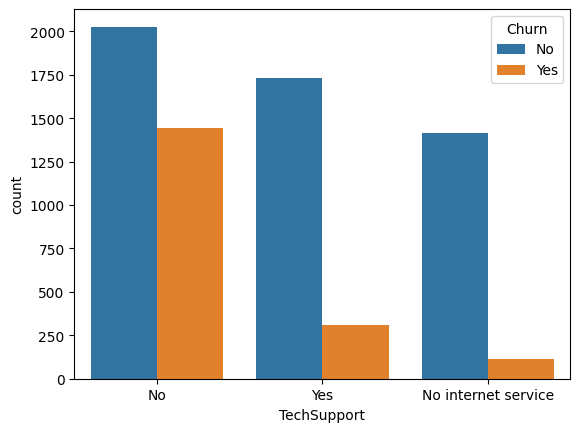

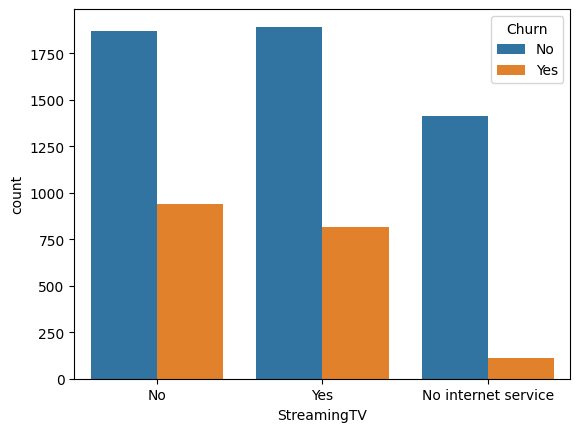

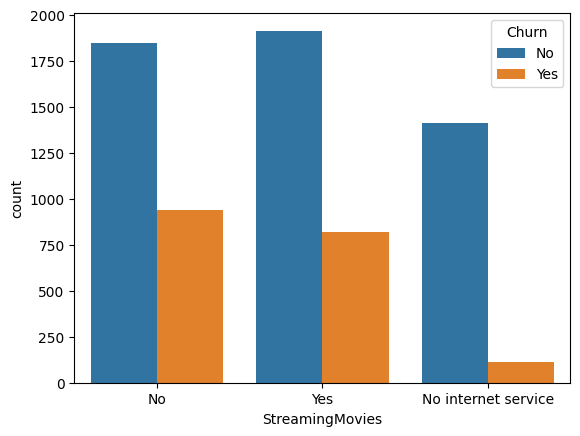

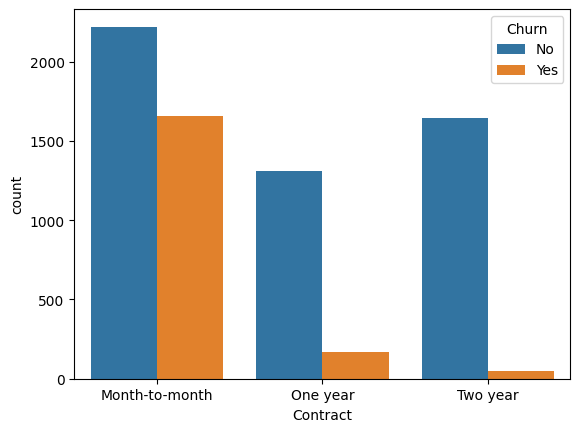

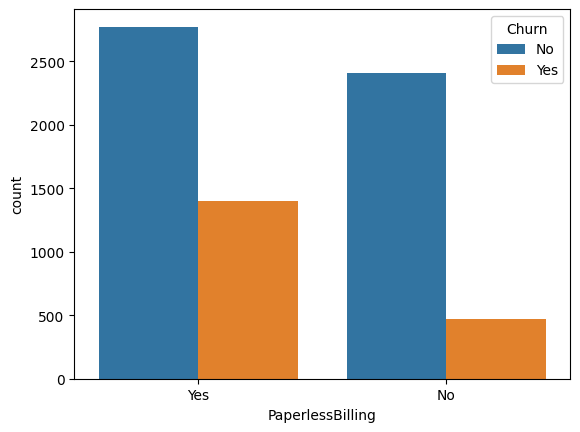

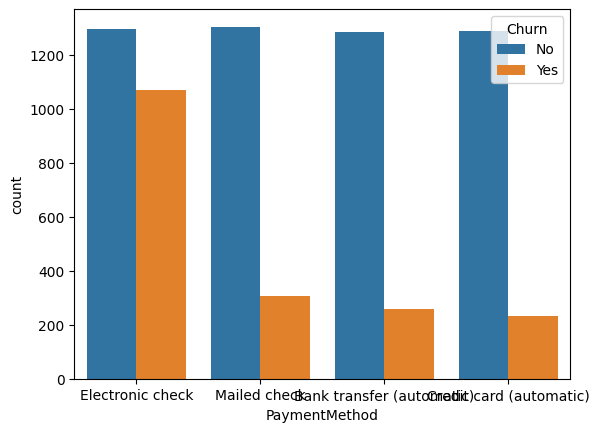

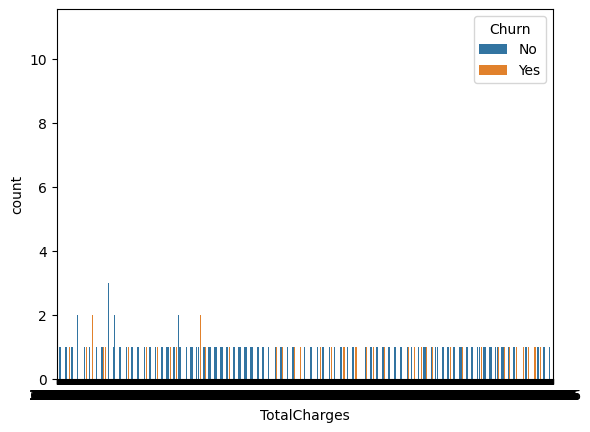

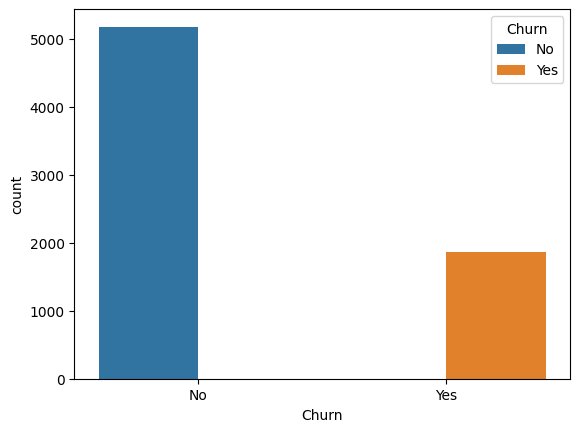

In [7]:
categories=list(customer_data.select_dtypes(include = ['object']).columns)

for features in categories:
    _=sns.countplot(x=features,hue = 'Churn', data=customer_data)
    plt.show()

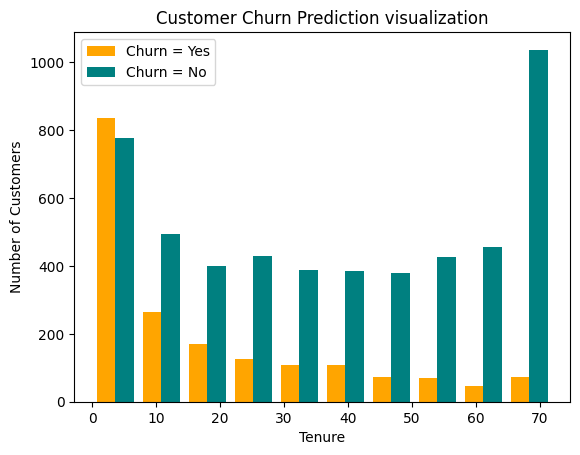

In [8]:
tenure_churn_no = customer_data[customer_data.Churn=='No'].tenure
tenure_churn_yes = customer_data[customer_data.Churn=='Yes'].tenure


plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction visualization')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['orange','teal'], label=['Churn = Yes','Churn = No'])

plt.legend()

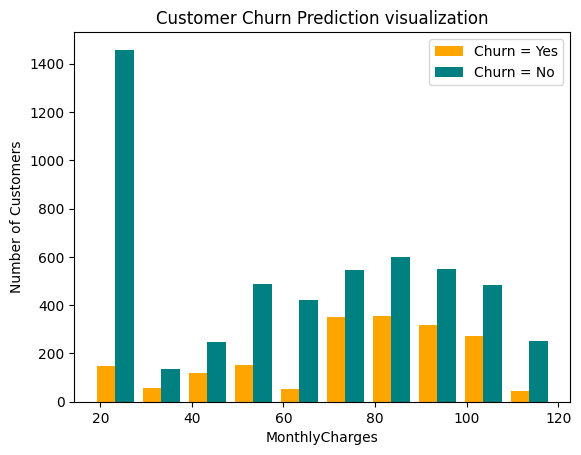

In [9]:
mc_churn_no = customer_data[customer_data.Churn=='No'].MonthlyCharges
mc_churn_yes = customer_data[customer_data.Churn=='Yes'].MonthlyCharges


plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction visualization')
plt.hist([mc_churn_yes,mc_churn_no],color=['orange','teal'], label=['Churn = Yes','Churn = No'])

plt.legend()

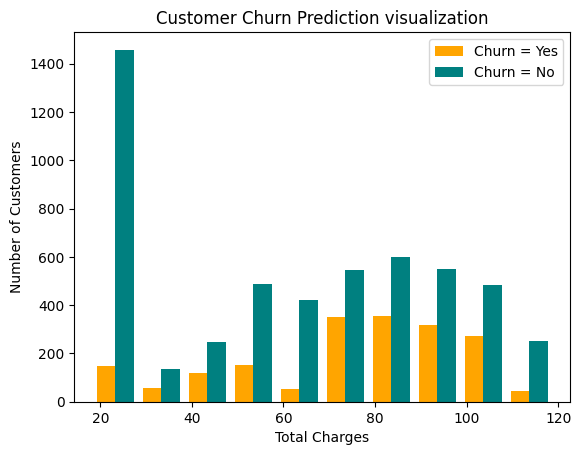

In [10]:
tc_churn_no = customer_data[customer_data.Churn=='No'].TotalCharges
tc_churn_yes = customer_data[customer_data.Churn=='Yes'].TotalCharges


plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction visualization')
plt.hist([mc_churn_yes,mc_churn_no],color=['orange','teal'], label=['Churn = Yes','Churn = No'])

plt.legend()

In [11]:
print('OBSERVATION 1: From the pie chart in figure 1 that there are less percentage of customers that churns')
print('OBSERVATION 2: From the bar plots it can be observed that Tenure, Monthly Charges and Total Charges all have a linking to customer churn')
print('OBSERVATION 3: From the bar plots it can be observed that gender of the customer does not necessarily affect the prediction of churn as they are almost relatively same')
print('OBSERVATION 4: The churn rate is higher when monthly charges are high')
print('OBSERVATION 5: Customer who pay monthly contract churn more than customers who pay yeatly contract')

OBSERVATION 1: From the pie chart in figure 1 that there are less percentage of customers that churns
OBSERVATION 2: From the bar plots it can be observed that Tenure, Monthly Charges and Total Charges all have a linking to customer churn
OBSERVATION 3: From the bar plots it can be observed that gender of the customer does not necessarily affect the prediction of churn as they are almost relatively same
OBSERVATION 4: The churn rate is higher when monthly charges are high
OBSERVATION 5: Customer who pay monthly contract churn more than customers who pay yeatly contract


In [12]:
# Getting information about the dataset to inspect null entries.

#Output: From the result there are more objects that integer or float values
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
# The number of customers with their respective characteristics
customers = customer_data.shape

print("The number of customers in the customer churn dataset is ",customers[0], " with ", customers[1], " distinct characteristics for each")

The number of customers in the customer churn dataset is  7043  with  20  distinct characteristics for each


In [14]:
# Checking for null values in each column of the characteristics as seen in the 'customer_data.info()'
customer_data.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

**Checking for data type consistency**

In [15]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Imputing a data object column

In [16]:
# Having encountered an error during first attempt on Exploratory Data Analysis,
# It can be observed that the 'TotalCharges' column of the dataset is an object which during scaling will throw an
# an error of inability to convert string into a float. Hence, a method below to handle the potential error
customer_data['TotalCharges'] = pd.to_numeric(customer_data['TotalCharges'], errors='coerce')
customer_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [17]:
# Checking data type to ensure it has been converted to the numeric datatype float
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [18]:
# Checking to confirm if there are any null values from the conversion
customer_data.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

**Handling the missing data in the 'TotalCharges' data column using Imputation**

In [19]:
# Counting the number of missing values to determine what method to use to handle the missing values
missing_values_count = customer_data['TotalCharges'].isnull().sum()

print(f"There are {missing_values_count} missing values in the Total Charges data column of the Customer Data")

# customer_data.dropna(inplace=True)

There are 11 missing values in the Total Charges data column of the Customer Data


In [20]:
# Extracting the TotalCharges column
total_charges_column = customer_data['TotalCharges']

# Reshape the data for Simple Imputation
reshaped_total_charges = total_charges_column.values.reshape(-1, 1)

# Initializing the SimpleImputer with mean strategy
imputer = SimpleImputer(strategy='mean')

# Fitting and transforming the imputer on the reshaped total charges column
imputed_reshaped_total_charges = imputer.fit_transform(reshaped_total_charges)

# Reshaping the imputed data back to the original shape
total_charges_imputed = imputed_reshaped_total_charges.flatten()

# Replace the original 'Total Charges' column with the imputed values
customer_data['TotalCharges'] = total_charges_imputed

customer_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [21]:
# Checking to see that the missing values are correctly imputed and the output is false
customer_data.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

**Convert all relevant objects to numeric data type to be able to work with them using LabelEncoding**

In [22]:
# Creating a copy of the dataset
encoded_customer_data = customer_data.copy()

# Applying label encoding to transform categorical data to numerical data for effective scaling
categorical_columns = ['Churn','gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
# Initializing the LabelEncoder
label_encoder = LabelEncoder()


# Apply label encoding to each categorical column
for column in categorical_columns:
    encoded_customer_data[column] = label_encoder.fit_transform(encoded_customer_data[column])

# Drop the original categorical columns
data = encoded_customer_data.drop(categorical_columns, axis=1)

encoded_customer_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


**Since some columns in the encoded customer datacolumns are not Label Encoded, we scale to standardize the numerical values using the Standard Scaler**

In [23]:
# Specifying the columns to drop and scale
dropped_encoded_customer_data = ['tenure', 'MonthlyCharges','TotalCharges']
scaled_data = encoded_customer_data[dropped_encoded_customer_data]

# Dropping the specified columns from the copied DataFrame that has been encoded
encoded_customer_data = encoded_customer_data.drop(columns=dropped_encoded_customer_data)

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the data to scale
new_data = pd.DataFrame(scaler.fit_transform(scaled_data), columns=dropped_encoded_customer_data)

# Then adding it back to the dataset customer_data copy => encoded_customer_data
final_customer_dataset = pd.concat([new_data,encoded_customer_data], axis=1)
final_customer_dataset

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,-1.277445,-1.160323,-0.994971,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0.066327,-0.259629,-0.173876,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,-1.236724,-0.362660,-0.960399,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0.514251,-0.746535,-0.195400,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,-1.236724,0.197365,-0.941193,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.129281,1,0,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,1.613701,1.277533,2.242808,0,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,-0.870241,-1.168632,-0.855182,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,-1.155283,0.320338,-0.872777,1,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


# 2. **EXTRACTING RELEVANT FEATURES THAT RELATE TO CHURNING**

**Performing feature imporatance using Using RFECV**

In [24]:
from sklearn.feature_selection import RFECV

# # Create a new DataFrame with specified columns dropped
new_data = final_customer_dataset.drop('Churn', axis=1).copy()

y = final_customer_dataset['Churn']
# Create a tree-based model (Random Forest in this example)

# Split the data into training and testing sets (if necessary)
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# # RFECV object
rfecv = RFECV(estimator=model, step=1, cv=3, scoring='accuracy')

rfecv.fit(new_data, y)

# selected features
selected_features = X_train.columns[rfecv.support_]

optimal_num_features = rfecv.n_features_
support_mask = rfecv.support_
selected_features = new_data.columns[support_mask]
selected_features

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [25]:
final_customer_dataset = final_customer_dataset[selected_features]
new_data = final_customer_dataset.copy()

#3. **TRAINING A MULTI-LAYER PERCEPTRON (MLP)**

**Train sets and test sets**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold

# Split the data into training sets (80%), testing sets (10%) and validation sets (10%)

# Splitting into training set (80%)
X_train, X_temp, y_train, y_temp = train_test_split(new_data, y, test_size=0.2, random_state=42)

# Splitting the remaining 20% into half for validation and testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

**Training the Artificial Neural Networks (ANN)**

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.metrics import roc_auc_score

- **Building ANN with Functional API**

In [28]:
# Keras Functional API model
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(64, activation='relu')(input_layer)
hidden_layer_2 = Dropout(0.25)
hidden_layer_3 = Dense(32, activation='relu')(hidden_layer_1)
hidden_layer_4 = Dropout(0.3)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/1000
89/89 [==============================] - 2s 8ms/step - loss: 0.6206 - accuracy: 0.6638 - val_loss: 0.5654 - val_accuracy: 0.7330
Epoch 2/1000
89/89 [==============================] - 0s 4ms/step - loss: 0.5347 - accuracy: 0.7343 - val_loss: 0.5104 - val_accuracy: 0.7358
Epoch 3/1000
89/89 [==============================] - 0s 4ms/step - loss: 0.4964 - accuracy: 0.7339 - val_loss: 0.4841 - val_accuracy: 0.7386
Epoch 4/1000
89/89 [==============================] - 0s 4ms/step - loss: 0.4748 - accuracy: 0.7549 - val_loss: 0.4676 - val_accuracy: 0.7685
Epoch 5/1000
89/89 [==============================] - 0s 4ms/step - loss: 0.4619 - accuracy: 0.7785 - val_loss: 0.4582 - val_accuracy: 0.7727
Epoch 6/1000
89/89 [==============================] - 0s 5ms/step - loss: 0.4539 - accuracy: 0.7833 - val_loss: 0.4513 - val_accuracy: 0.7727
Epoch 7/1000
89/89 [==============================] - 0s 5ms/step - loss: 0.4481 - accuracy: 0.7879 - val_loss: 0.4462 - val_accuracy: 0.7812
Epoch 

In [29]:
# Evaluating the model on the train set
test_loss, test_accuracy = model.evaluate(X_train, y_train)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

177/177 [==============================] - 1s 2ms/step - loss: 0.4130 - accuracy: 0.8049
Test Loss: 0.4130
Test Accuracy: 0.8049
23/23 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8184
Test Loss: 0.3886
Test Accuracy: 0.8184


#4. **EVALUATING MODEL ACCURACY AND AUC SCORE**

# Hyper-Parameter Tuning

In [45]:
!pip install scikeras

import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier



# Define the Keras model as a function
def create_model(batch_size=32, epochs=100):
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer_1 = Dense(32, activation='relu')(input_layer)
    hidden_layer_2 = Dense(16, activation='relu')(hidden_layer_1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer_2)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

    return model


# Wrap the Keras model in a scikit-learn compatible wrapper
keras_classifier = KerasClassifier(model=create_model, verbose=2)


#, callbacks=[EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)]

# Define hyperparameters to search
param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [40, 80, 120]
}

# Define scoring metric
scoring = {'AUC': 'roc_auc', 'Accuracy': 'accuracy'}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, scoring=scoring, cv=StratifiedKFold(n_splits=5), refit='AUC', verbose=1)

# Fit the model with cross-validation
grid_result = grid_search.fit(X_train, y_train)

# Get the best-trained model
best_model = grid_result.best_estimator_.model

# Get the best parameters
best_params = grid_result.best_params_

# Build a new model with the best parameters
new_model = create_model(batch_size=best_params['batch_size'], epochs=best_params['epochs'])

# Train the new model on the entire training set
new_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)], verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = new_model.evaluate(X_test, y_test)

# Print results
print("Best parameters found: ", best_params)
print("Best AUC score found: ", grid_result.best_score_)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_accuracy)


Streaming output truncated to the last 5000 lines.
282/282 - 1s - loss: 0.3903 - accuracy: 0.8192 - 725ms/epoch - 3ms/step
Epoch 119/120
282/282 - 1s - loss: 0.3886 - accuracy: 0.8190 - 668ms/epoch - 2ms/step
Epoch 120/120
282/282 - 1s - loss: 0.3913 - accuracy: 0.8168 - 693ms/epoch - 2ms/step
71/71 - 0s - 197ms/epoch - 3ms/step
71/71 - 0s - 141ms/epoch - 2ms/step
Epoch 1/40
141/141 - 1s - loss: 0.4963 - accuracy: 0.7515 - 1s/epoch - 9ms/step
Epoch 2/40
141/141 - 0s - loss: 0.4437 - accuracy: 0.7877 - 360ms/epoch - 3ms/step
Epoch 3/40
141/141 - 0s - loss: 0.4364 - accuracy: 0.7850 - 349ms/epoch - 2ms/step
Epoch 4/40
141/141 - 0s - loss: 0.4323 - accuracy: 0.7868 - 327ms/epoch - 2ms/step
Epoch 5/40
141/141 - 0s - loss: 0.4305 - accuracy: 0.7899 - 299ms/epoch - 2ms/step
Epoch 6/40
141/141 - 0s - loss: 0.4287 - accuracy: 0.7903 - 316ms/epoch - 2ms/step
Epoch 7/40
141/141 - 0s - loss: 0.4272 - accuracy: 0.7908 - 367ms/epoch - 3ms/step
Epoch 8/40
141/141 - 0s - loss: 0.4261 - accuracy: 0.78

In [46]:
best_params

{'batch_size': 64, 'epochs': 40}

In [47]:
grid_result.best_estimator_.optimizer

'rmsprop'

In [60]:
churn_model = create_model()
history = churn_model.fit(X_train,y_train, batch_size=64,epochs=40, validation_data=(X_val, y_val))

Epoch 1/40
89/89 [==============================] - 2s 7ms/step - loss: 0.4923 - accuracy: 0.7547 - val_loss: 0.4402 - val_accuracy: 0.7912
Epoch 2/40
89/89 [==============================] - 0s 4ms/step - loss: 0.4361 - accuracy: 0.7870 - val_loss: 0.4308 - val_accuracy: 0.7997
Epoch 3/40
89/89 [==============================] - 1s 15ms/step - loss: 0.4312 - accuracy: 0.7897 - val_loss: 0.4254 - val_accuracy: 0.8011
Epoch 4/40
89/89 [==============================] - 1s 6ms/step - loss: 0.4292 - accuracy: 0.7888 - val_loss: 0.4251 - val_accuracy: 0.7940
Epoch 5/40
89/89 [==============================] - 0s 4ms/step - loss: 0.4268 - accuracy: 0.7902 - val_loss: 0.4265 - val_accuracy: 0.8011
Epoch 6/40
89/89 [==============================] - 0s 5ms/step - loss: 0.4255 - accuracy: 0.7936 - val_loss: 0.4242 - val_accuracy: 0.8026
Epoch 7/40
89/89 [==============================] - 0s 5ms/step - loss: 0.4241 - accuracy: 0.7959 - val_loss: 0.4294 - val_accuracy: 0.8011
Epoch 8/40
89/89 [=

In [61]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [62]:
epochs = history.epoch
history = history.history

**Visualizing the train and test loss**

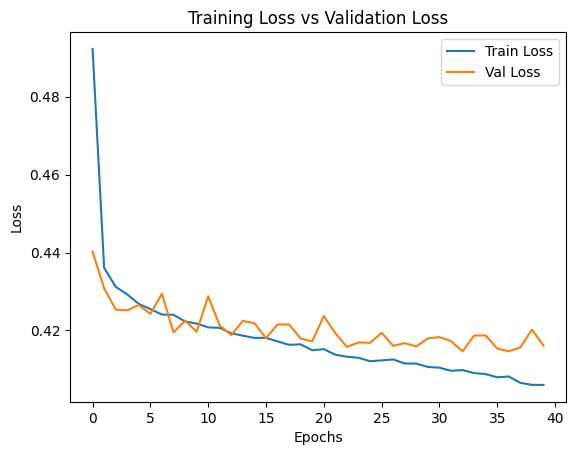

In [63]:
# Visualize the train and test losses
plt.title("Training Loss vs Validation Loss")
plt.plot(epochs, history["loss"], label="Train Loss")
plt.plot(epochs, history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

**Visualizing the accuracy for train and validation sets**

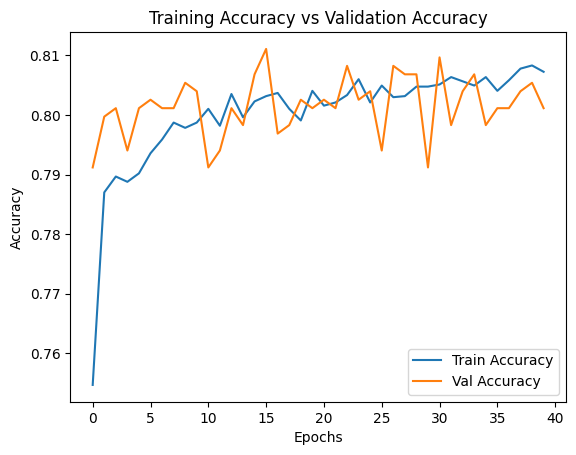

In [64]:
# Visualize Accuracy for train and validation sets
plt.title("Training Accuracy vs Validation Accuracy")
plt.plot(epochs, history["accuracy"], label="Train Accuracy")
plt.plot(epochs, history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# **Getting the accuracy scores**

In [65]:
# Evaluating model accuracy and loss on test data
test_loss, test_accuracy = churn_model.evaluate(X_test, y_test)

23/23 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8184


In [66]:
# Predict on test data
y_pred = churn_model.predict(X_test)
y_pred_val = churn_model.predict(X_val)


22/22 [==============================] - 0s 2ms/step


In [67]:
new_y_pred_val = (y_pred_val >= 0.5).astype(int)

In [68]:
new_y_pred = (y_pred >= 0.5).astype(int)

In [69]:
# Calculate accuracy
accuracy = accuracy_score(y_test, new_y_pred)
accuracy_val = accuracy_score(y_val, new_y_pred_val)
print(f"Test Accuracy: {accuracy}")
print(f"Validation Accuracy: {accuracy_val}")

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)
auc_score_val = roc_auc_score(y_val, y_pred_val)
print(f"Test AUC Score: {auc_score}")
print(f"Validation AUC Score: {auc_score_val}")

Test Accuracy: 0.8184397163120567
Validation Accuracy: 0.8011363636363636
Test AUC Score: 0.8631414838295316
Validation AUC Score: 0.8482710826549716


#**Saving Model**

In [70]:
model.save('/content/drive/My Drive/Colab Notebooks/churn_customers_prediction.h5')

In [71]:
import pickle
with open('customers.pkl', 'wb') as file:
    pickle.dump(scaler, file)